<a href="https://colab.research.google.com/github/Djaxis/MY-Python-Evolution/blob/main/4_2_ML_pipeline_Cross_Validation_De_Campos_Brice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cours

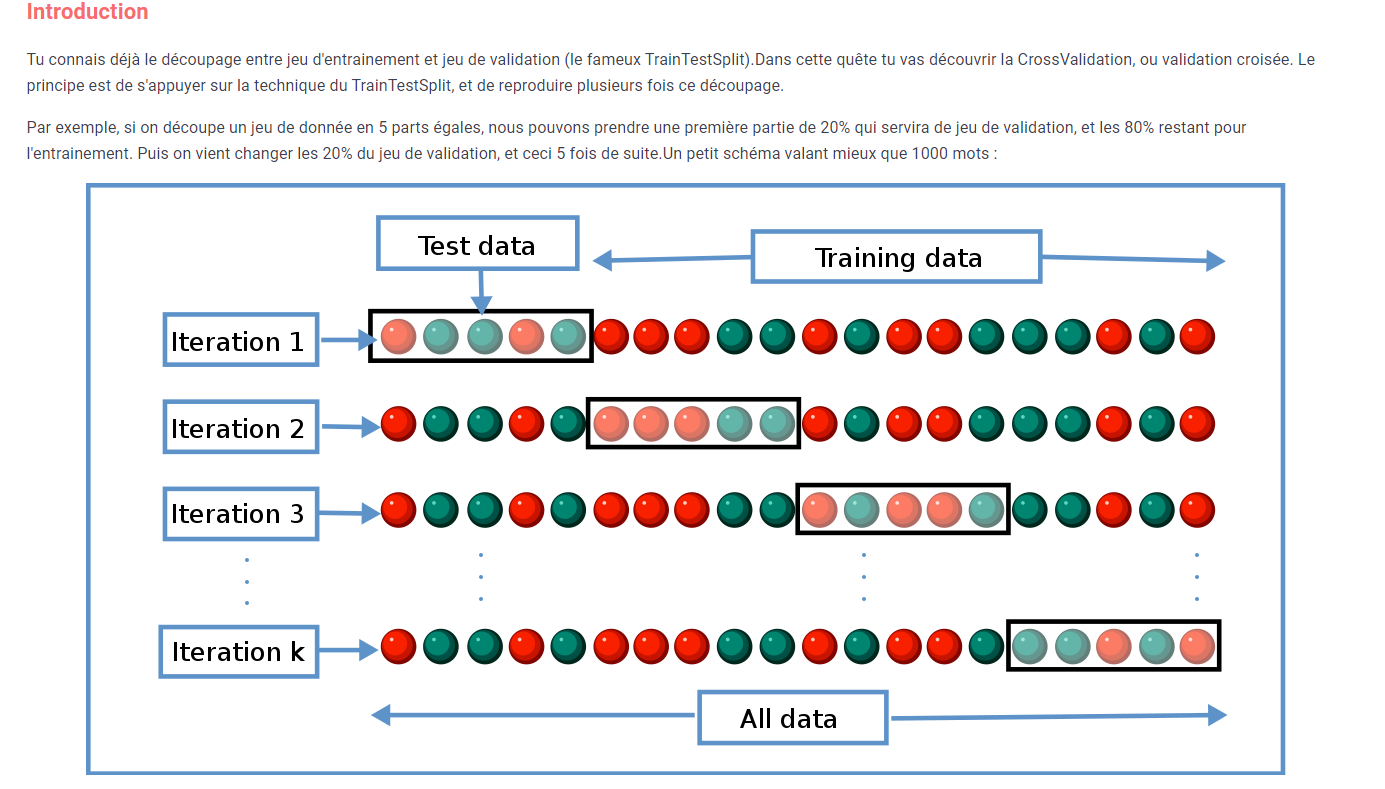

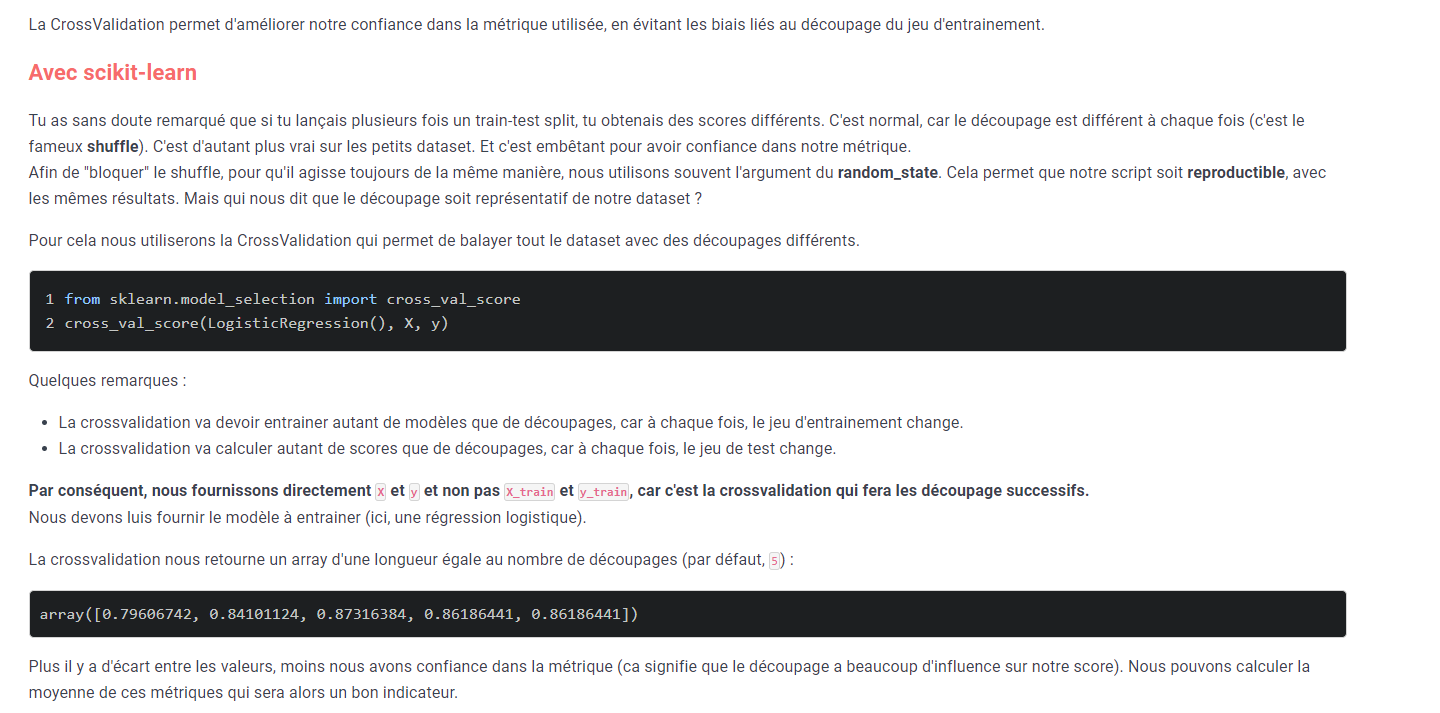

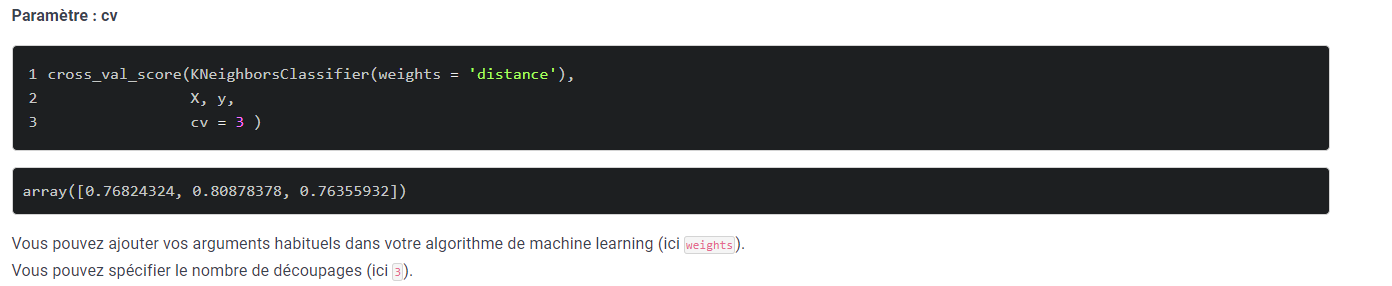

# Importation Datasets et informations

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score, r2_score

In [ ]:
titanic =pd.read_csv("/content/titanic.csv")

In [ ]:
# information de la database, colonnes et type de données
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
# info()
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


# exploration de la data

In [ ]:
# factorisation de la data sex
titanic['Sex']=titanic['Sex'].factorize()[0]

In [ ]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,0,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,1,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,0,35.0,0,0,8.0500


# Machine learning target 'Survived decsion trees'




```
#
Tu vas effectuer une classification supervisée sur la colonne "survived", en effectuant un traintestsplit (sans fixer le random_state),

puis un classifieur de ton choix (knn,decision tree, régression logistique, etc...).
Tu dois faire apparaitre clairement l'accuracy score du jeu d'entrainement
et celui du jeu de test.

Dans un nouveau bloc de code, tu vas effectuer exactement la même étape que précédemment.
Comme tu n'as pas fixer le random_state, le score devrait être différent.

Avec ce même classifier, tu vas lancer une crossvalidation
avec un découpage en 6 parties.
La CrossValidation renforce-t-elle votre confiance dans cette prédiction ?

Tu vas calculer la moyenne et l'écart-type des 6 scores obtenus.
```



#Decision Tree classifier

In [ ]:
titanic['Survived'].replace({0:'Dead', 1:'Survivor'}, inplace=True)

In [ ]:
X=titanic.drop(columns=["Name","Survived"])
y=titanic['Survived']

X_train,X_test, y_train,y_test=train_test_split(X,y, train_size = 0.80)

In [ ]:
modelDTC = DecisionTreeClassifier()

In [ ]:
model1=modelDTC.fit(X_train, y_train)

In [ ]:
# Predict on the xtest set
# INSERT CODE HERE
predictions = model1.predict(X_test)
predictions

array(['Dead', 'Dead', 'Dead', 'Dead', 'Survivor', 'Dead', 'Survivor',
       'Dead', 'Dead', 'Survivor', 'Dead', 'Survivor', 'Dead', 'Survivor',
       'Dead', 'Survivor', 'Dead', 'Dead', 'Survivor', 'Dead', 'Dead',
       'Dead', 'Dead', 'Dead', 'Dead', 'Survivor', 'Dead', 'Survivor',
       'Dead', 'Dead', 'Survivor', 'Survivor', 'Dead', 'Survivor', 'Dead',
       'Dead', 'Dead', 'Survivor', 'Survivor', 'Dead', 'Dead', 'Dead',
       'Dead', 'Dead', 'Dead', 'Dead', 'Survivor', 'Dead', 'Survivor',
       'Survivor', 'Survivor', 'Dead', 'Survivor', 'Dead', 'Dead', 'Dead',
       'Survivor', 'Dead', 'Dead', 'Survivor', 'Dead', 'Survivor',
       'Survivor', 'Dead', 'Survivor', 'Survivor', 'Survivor', 'Dead',
       'Dead', 'Dead', 'Dead', 'Survivor', 'Dead', 'Dead', 'Dead',
       'Survivor', 'Dead', 'Survivor', 'Dead', 'Dead', 'Survivor', 'Dead',
       'Dead', 'Dead', 'Dead', 'Dead', 'Survivor', 'Survivor', 'Dead',
       'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Survivor', 'Dead',
  

In [ ]:
# Print out the R2 score.
# INSERT CODE HERE
print("\nScore for the Train dataset :", model1.score(X_train, y_train))
print("Score for the Test dataset :", model1.score(X_test, y_test))


Score for the Train dataset : 0.9802538787023978
Score for the Test dataset : 0.8033707865168539


In [ ]:
# après avoir fait tourner une deuxieme fois  le test
print("\nScore for the Train dataset :", model1.score(X_train, y_train))
print("Score for the Test dataset :", model1.score(X_test, y_test))


Score for the Train dataset : 0.9802538787023978
Score for the Test dataset : 0.8033707865168539


In [ ]:
# Print each feature with importance %
# INSERT CODE HERE
model1.feature_importances_

array([0.10477369, 0.30295659, 0.25590577, 0.06533493, 0.03242188,
       0.23860714])

In [ ]:
pd.DataFrame(data = modelDTC.feature_importances_,
             index = X.columns,
             columns = ['importance(%)'])

,importance(%)
Pclass,0.104774
Sex,0.302957
Age,0.255906
Siblings/Spouses Aboard,0.065335
Parents/Children Aboard,0.032422
Fare,0.238607


In [ ]:
accuracy_score(y_test, modelDTC.predict(X_test))

0.8033707865168539

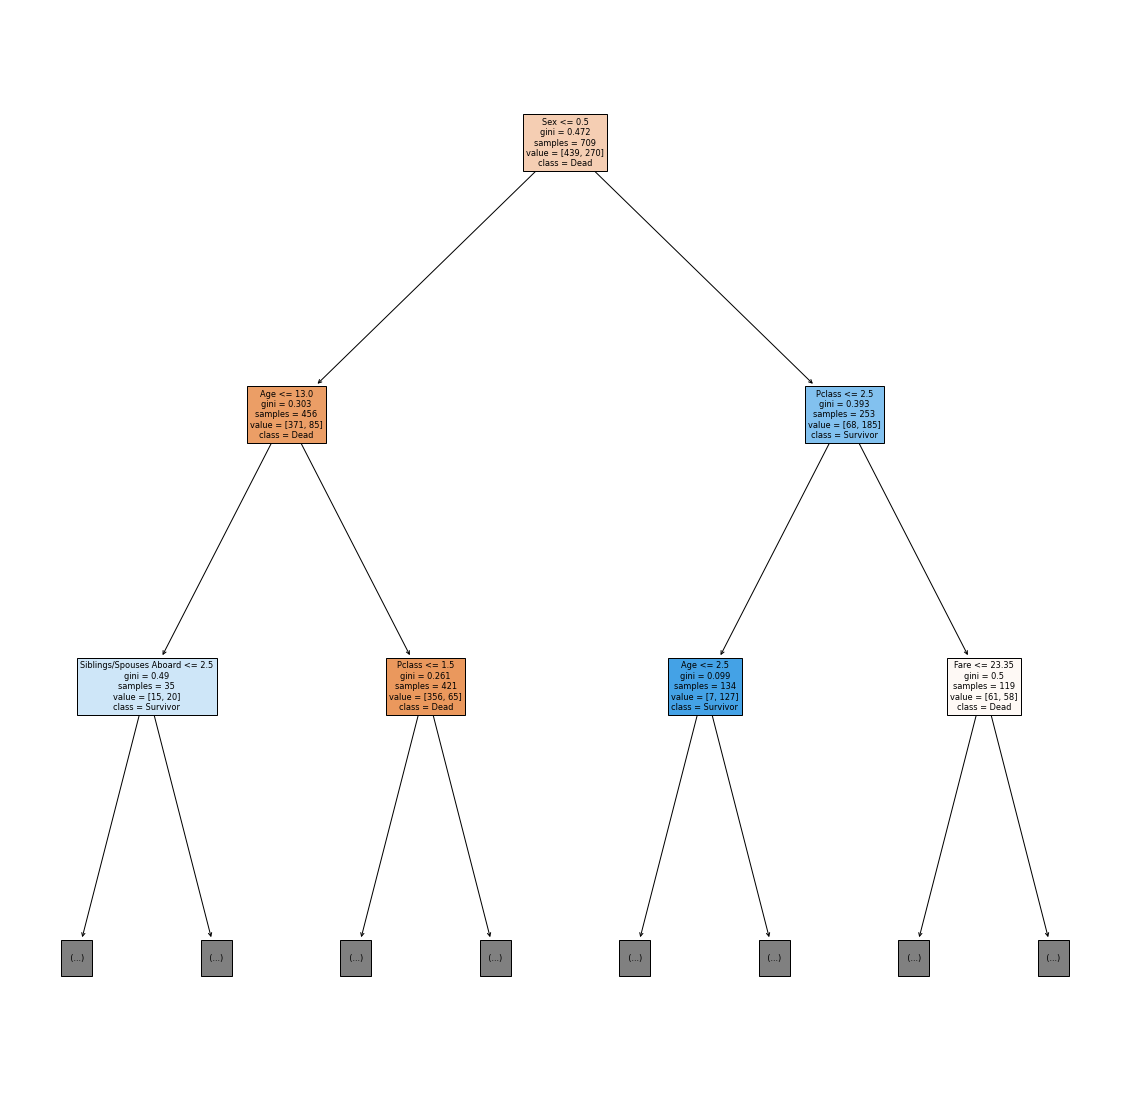

In [ ]:
# Plot the results
# Use column names as feature names and a max_depth of only 2
# INSERT CODE HERE
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20))
plot_tree(modelDTC, filled = True,  class_names=  modelDTC.classes_, #NB : modelDTC.classes_ is ['Female', 'Male'] because this is a classification
          feature_names=X_train.columns, max_depth = 2 )
plt.show()

# Decision Tree with cross validation

In [ ]:
titanic['Survived'].replace({0:'Dead', 1:'Survivor'}, inplace=True)

In [ ]:
X1=titanic.drop(columns=["Name","Survived"])
y1=titanic['Survived']

X_train,X_test, y_train,y_test=train_test_split(X1,y1, train_size = 0.80)

In [ ]:
modelDTC2 = DecisionTreeClassifier()

In [ ]:
model12=modelDTC2.fit(X_train, y_train)

In [ ]:
predictions = model12.predict(X_test)
predictions

array(['Dead', 'Survivor', 'Dead', 'Survivor', 'Survivor', 'Survivor',
       'Dead', 'Survivor', 'Survivor', 'Dead', 'Survivor', 'Dead',
       'Survivor', 'Survivor', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead',
       'Dead', 'Dead', 'Dead', 'Survivor', 'Survivor', 'Survivor', 'Dead',
       'Dead', 'Survivor', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead',
       'Survivor', 'Survivor', 'Survivor', 'Dead', 'Dead', 'Survivor',
       'Survivor', 'Survivor', 'Dead', 'Dead', 'Dead', 'Dead', 'Dead',
       'Dead', 'Survivor', 'Survivor', 'Dead', 'Survivor', 'Dead',
       'Survivor', 'Dead', 'Dead', 'Survivor', 'Dead', 'Survivor', 'Dead',
       'Dead', 'Dead', 'Survivor', 'Survivor', 'Survivor', 'Dead', 'Dead',
       'Dead', 'Dead', 'Dead', 'Dead', 'Dead', 'Survivor', 'Survivor',
       'Survivor', 'Survivor', 'Dead', 'Dead', 'Survivor', 'Dead', 'Dead',
       'Survivor', 'Dead', 'Survivor', 'Survivor', 'Survivor', 'Dead',
       'Dead', 'Dead', 'Survivor', 'Dead', 'Survivor', 'Dead', 'Dead',
  

In [ ]:
print("\nScore for the Train dataset :", model12.score(X_train, y_train))
print("Score for the Test dataset :", model12.score(X_test, y_test))


Score for the Train dataset : 0.9901269393511989
Score for the Test dataset : 0.797752808988764


In [ ]:
model12.feature_importances_

array([0.09953946, 0.31755568, 0.26881003, 0.04782034, 0.01958998,
       0.2466845 ])

In [ ]:
pd.DataFrame(data = modelDTC2.feature_importances_,
             index = X.columns,
             columns = ['importance(%)'])

,importance(%)
Pclass,0.099539
Sex,0.317556
Age,0.268810
Siblings/Spouses Aboard,0.047820
Parents/Children Aboard,0.019590
Fare,0.246685


In [ ]:
# importation pour la Cross Validation avec la technique de K-Fold
from sklearn.model_selection import KFold

In [ ]:
cv=KFold(6)

In [ ]:
j_ai_reussi=cross_val_score(DecisionTreeClassifier(),
                X, y,
                cv = cv, scoring='accuracy' )

In [ ]:
j_ai_reussi
# résultat sorti .
# La crossvalidation va devoir entrainer autant de modèles que de découpages, car à chaque fois, le jeu d'entrainement change.
# La crossvalidation va calculer autant de scores que de découpages, car à chaque fois, le jeu de test change

array([0.69594595, 0.76351351, 0.7972973 , 0.79054054, 0.73648649,
       0.82993197])

In [ ]:
# Plus il y a d'écart entre les valeurs, moins nous avons confiance dans la métrique
# (ca signifie que le découpage a beaucoup d'influence sur notre score).
# Nous pouvons calculer la moyenne de ces métriques qui sera alors un bon indicateur.

In [ ]:
# moyenne du cross_val_score
j_ai_reussi.mean()

0.7689526260954832

In [ ]:
# standard deviation result
j_ai_reussi.std()

0.04359195008266116

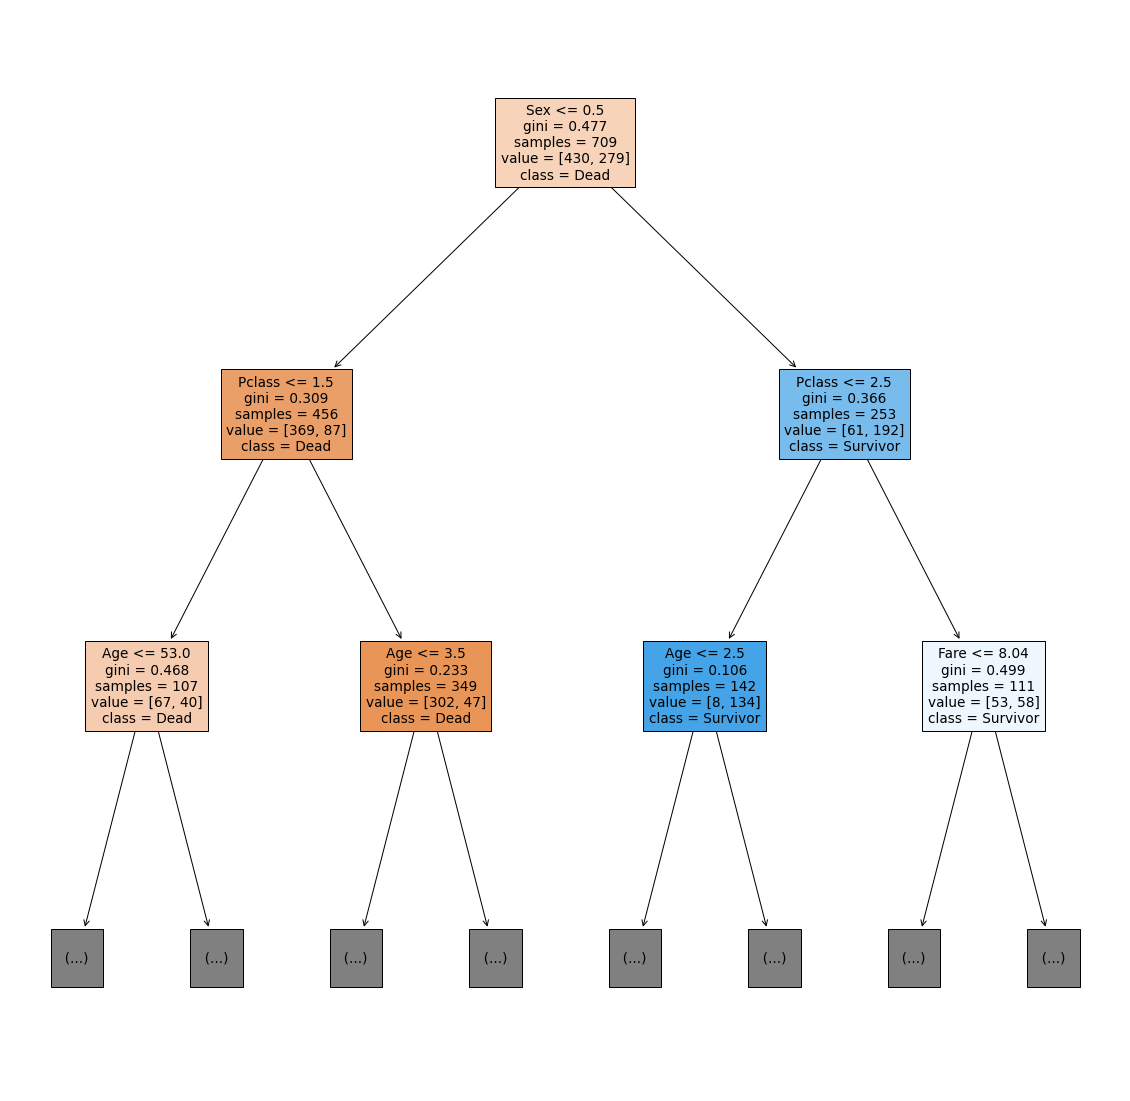

In [ ]:
# Plot the results
# Use column names as feature names and a max_depth of only 2
# INSERT CODE HERE
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20))
plot_tree(modelDTC2, filled = True,  class_names=  modelDTC2.classes_, #NB : modelDTC.classes_ is ['Female', 'Male'] because this is a classification
          feature_names=X_train.columns, max_depth = 2 )
plt.show()

In [ ]:
# analyse des 2 decision trees , les values on changer selon le depth et malgré le gini reste le meme
